# Data Cleaning

In [86]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 1. Data Collection and Inspection

In [87]:
df = pd.read_csv('messy_customer_data.csv')
df.head(10)

,CustomerID,Name,Gender,Age,City,Signup_Date,Last_purchase_date,purchase_amount,feedback_score,email,Phone_number,Country
0,NaN,Ankit,F,36.0,Mumbai,31/12/2024,13/08/2025,-999.00,2.0,NaN,0,Canada
1,C2,Ravi,Female,NaN,Kolkata,NaN,NaN,NaN,-1.0,user1mail.com,abc123,Canada
2,3,Ravi,female,66.0,Ahmedabad,NaN,20/06/2023,NaN,10.0,user2@mail.com,abc123,India
3,C4,Ankit,male,44.0,Kolkata,NaN,13/09/2025,NaN,NaN,NaN,9316267914,USA
4,5,Rahul,Male,200.0,Ahmedabad,09/07/2025,NaN,-999.00,NaN,user4mail.com,9234603292,USA
5,C6,Amit,NaN,64.0,Mumbai,not_a_date,NaN,NaN,5.0,NaN,abc123,UK
6,7,Kiran,NaN,200.0,Pune,not_a_date,missing,-999.00,NaN,user6mail.com,NaN,Australia
7,8,Rahul,NaN,200.0,Delhi,NaN,15/11/2021,-999.00,10.0,user7@mail.com,abc123,Canada
8,C9,Simran,Female,NaN,Pune,not_a_date,NaN,-999.00,-1.0,NaN,abc123,India
9,10,Simran,NaN,NaN,Pune,18/12/2023,missing,887.49,10.0,user9mail.com,0,Canada


In [4]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          7621 non-null   object 
 1   Name                8342 non-null   object 
 2   Gender              7545 non-null   object 
 3   Age                 7424 non-null   float64
 4   City                8870 non-null   object 
 5   Signup_Date         7471 non-null   object 
 6   Last_purchase_date  6714 non-null   object 
 7   purchase_amount     4967 non-null   float64
 8   feedback_score      7538 non-null   float64
 9   email               4934 non-null   object 
 10  Phone_number        7556 non-null   object 
 11  Country             8296 non-null   object 
dtypes: float64(3), object(9)
memory usage: 937.6+ KB


In [88]:
# Statistical Summary
df.describe().round()

,Age,purchase_amount,feedback_score
count,7424.0,4967.0,7538.0
mean,79.0,714.0,4.0
std,88.0,2002.0,5.0
min,-5.0,-999.0,-1.0
25%,-5.0,-999.0,-1.0
50%,43.0,-999.0,3.0
75%,200.0,2438.0,10.0
max,200.0,4999.0,10.0


In [7]:
# no.of rows and columns
df.shape

(10000, 12)

## 2. Handling Duplicate

In [89]:
#  Duplicate Values
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [90]:
df['CustomerID'].value_counts().head(10)

CustomerID
C2       1
6668     1
C6682    1
6681     1
C6678    1
C6677    1
6676     1
6675     1
6674     1
6673     1
Name: count, dtype: int64

In [91]:
# Analysing Duplicate Categorical Values
for col in df.columns:
    if df[col].nunique() < 20:
        print(df[col].value_counts())
        print('--'*50)

Name
Rahul     876
Sneha     870
Kiran     868
Ankit     845
Priya     831
Ravi      828
Neha      813
Amit      809
Simran    801
Pooja     801
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      1325
female    1270
F         1262
M         1249
male      1226
Female    1213
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
City
Hyderabad    1144
Mumbai       1133
Pune         1130
Bangalore    1120
Chennai      1109
Delhi        1091
Ahmedabad    1087
Kolkata      1056
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
feedback_score
 10.0    2521
-1.0     2489
 3.0      556
 1.0      532
 5.0      522
 2.0      495
 4.0      423
Name: count, dtype: int64
-----------------------------------------------------------------------------------------

In [92]:
df[df.duplicated()].shape

(0, 12)

## 3. Fixing Inconsistent Formatting

In [93]:
# Checking the values of Gender column
df['Gender'].unique()

array(['F', 'Female', 'female', 'male', 'Male', nan, 'M'], dtype=object)

In [94]:
# Converting all the values in Lower
df['Gender'] = df['Gender'].str.lower()

In [96]:
# Converting the values using dictionary
df['Gender'].replace({'m' : 'male','f': 'female'},inplace = True)

In [97]:
# Final Result
df['Gender'].unique()

array(['female', 'male', nan], dtype=object)

In [98]:
df['CustomerID'].unique()

array([nan, 'C2', '3', ..., '9996', '9998', '10000'], dtype=object)

In [99]:
# Formatting the CustomerID
df['CustomerID'] = df['CustomerID'].astype(str).str.extract('(\d+)')
df['CustomerID'] = 'C' + df['CustomerID']

In [100]:
# Final Result
df['CustomerID'].unique()

array([nan, 'C2', 'C3', ..., 'C9996', 'C9998', 'C10000'], dtype=object)

In [101]:
df['Signup_Date'].unique()

array(['31/12/2024', nan, '09/07/2025', ..., '20/02/2022', '09/02/2024',
       '24/05/2022'], dtype=object)

In [102]:
# Converting Signup_Date into datetime format
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], dayfirst=True, errors='coerce')

In [103]:
# Converting Signup_Date into proper format
df['Signup_Date'] = df['Signup_Date'].dt.strftime('%d/%m/%y')

In [104]:
# Final Result
df['Signup_Date'].unique()

array(['31/12/24', nan, '09/07/25', ..., '20/02/22', '09/02/24',
       '24/05/22'], dtype=object)

In [105]:
df['Last_purchase_date'].unique()

array(['13/08/2025', nan, '20/06/2023', ..., '23/10/2021', '23/06/2024',
       '17/09/2020'], dtype=object)

In [108]:
# Convert column to datetime format
df['Last_purchase_date'] = pd.to_datetime(df['Last_purchase_date'], dayfirst=True, errors='coerce')

In [109]:
df['Last_purchase_date'] = df['Last_purchase_date'].dt.strftime('%d/%m/%y')

In [110]:
# Final Result
df['Last_purchase_date'].unique()

array(['13/08/25', nan, '20/06/23', ..., '23/10/21', '23/06/24',
       '17/09/20'], dtype=object)

## 4. Correcting Data Types

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          7621 non-null   object 
 1   Name                8342 non-null   object 
 2   Gender              7545 non-null   object 
 3   Age                 7424 non-null   float64
 4   City                8870 non-null   object 
 5   Signup_Date         4996 non-null   object 
 6   Last_purchase_date  3348 non-null   object 
 7   purchase_amount     4967 non-null   float64
 8   feedback_score      7538 non-null   float64
 9   email               4934 non-null   object 
 10  Phone_number        7556 non-null   object 
 11  Country             8296 non-null   object 
dtypes: float64(3), object(9)
memory usage: 937.6+ KB


In [112]:
# Converting to Datetime Format
df['Signup_Date'] = df['Signup_Date'].astype('datetime64[ns]')
df['Last_purchase_date'] = df['Last_purchase_date'].astype('datetime64[ns]')

In [113]:
df['Age'] = df['Age'].astype('float64')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          7621 non-null   object        
 1   Name                8342 non-null   object        
 2   Gender              7545 non-null   object        
 3   Age                 7424 non-null   float64       
 4   City                8870 non-null   object        
 5   Signup_Date         4996 non-null   datetime64[ns]
 6   Last_purchase_date  3348 non-null   datetime64[ns]
 7   purchase_amount     4967 non-null   float64       
 8   feedback_score      7538 non-null   float64       
 9   email               4934 non-null   object        
 10  Phone_number        7556 non-null   object        
 11  Country             8296 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 937.6+ KB


## 5. Handling Missing Values

In [115]:
# Checking percentage of missing values
df.isnull().sum()/len(df) * 100

CustomerID            23.79
Name                  16.58
Gender                24.55
Age                   25.76
City                  11.30
Signup_Date           50.04
Last_purchase_date    66.52
purchase_amount       50.33
feedback_score        24.62
email                 50.66
Phone_number          24.44
Country               17.04
dtype: float64

In [116]:
# Drop unnecessary columns
df.drop(['Phone_number','email'], axis = 1, inplace = True)

In [125]:
# Remove null values
df.dropna(subset = ['Name', 'Gender','CustomerID'], inplace = True)

In [118]:
df['Age'].unique()

array([ 36.,  nan,  66.,  44., 200.,  -5.,  50.,  67.,  47.,  22.,  38.,
        24.,  59.,  51.,  57.,  46.,  39.,  28.,  35.,  68.,  65.,  45.,
        31.,  64.,  58.,  69.,  61.,  52.,  70.,  26.,  53.,  21.,  41.,
        48.,  62.,  37.,  19.,  25.,  63.,  56.,  34.,  43.,  20.,  30.,
        29.,  27.,  60.,  23.,  32.,  33.,  54.,  18.,  42.,  55.,  49.,
        40.])

In [119]:
# Apply custom function to transform column data
import re
def extract_age(age):
    age_num = re.findall('[0-9]+',str(age))
    if len(age_num) > 0:
        return age_num[0]
    else:
        return age

df['Age'] = df['Age'].apply(lambda x: extract_age(x))

In [120]:
# Final Result
df['Age'].unique()

array(['36', nan, '66', '44', '200', '5', '50', '67', '47', '22', '38',
       '24', '59', '51', '57', '46', '39', '28', '35', '68', '65', '45',
       '31', '64', '58', '69', '61', '52', '70', '26', '53', '21', '41',
       '48', '62', '37', '19', '25', '63', '56', '34', '43', '20', '30',
       '29', '27', '60', '23', '32', '33', '54', '18', '42', '55', '49',
       '40'], dtype=object)

In [121]:
df_age = df[df['Age'] !='nan']['Age']                         
age_median = int(df_age.dropna().astype('int64').median())    # Median of Age
df.replace('nan', age_median, inplace = True)                 # Replacing nan by median
df['Age'].fillna(age_median, inplace = True)                  # filling missing values

In [122]:
df.replace('200',age_median, inplace = True)

In [123]:
df['Age'].unique()

array(['36', 43, '66', '44', '5', '50', '67', '47', '22', '38', '24',
       '59', '51', '57', '46', '39', '28', '35', '68', '65', '45', '31',
       '64', '58', '69', '61', '52', '70', '26', '53', '21', '41', '48',
       '62', '37', '19', '25', '63', '56', '34', '43', '20', '30', '29',
       '27', '60', '23', '32', '33', '54', '18', '42', '55', '49', '40'],
      dtype=object)

In [124]:
# Using backward and forward fill for datetime columns
df['Signup_Date'].ffill(inplace = True)
df['Last_purchase_date'].bfill(inplace= True)

In [126]:
# Using mode to fill missing values of Country and City
country_mode = df['Country'].mode()[0]
df['Country'].fillna(country_mode, inplace = True)

In [127]:
city_mode = df['City'].mode()[0]
df['City'].fillna(city_mode, inplace = True)

In [128]:
# Filling missing values using mean
df['purchase_amount'].fillna(df['purchase_amount'].mean(), inplace = True)
df['feedback_score'].fillna(df['feedback_score'].mean(), inplace = True)

In [129]:
# Checking the Final Result
df.isnull().sum()

CustomerID            0
Name                  0
Gender                0
Age                   0
City                  0
Signup_Date           0
Last_purchase_date    0
purchase_amount       0
feedback_score        0
Country               0
dtype: int64

In [131]:
df['Age'] = df['Age'].astype('float64')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4781 entries, 1 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          4781 non-null   object        
 1   Name                4781 non-null   object        
 2   Gender              4781 non-null   object        
 3   Age                 4781 non-null   float64       
 4   City                4781 non-null   object        
 5   Signup_Date         4781 non-null   datetime64[ns]
 6   Last_purchase_date  4781 non-null   datetime64[ns]
 7   purchase_amount     4781 non-null   float64       
 8   feedback_score      4781 non-null   float64       
 9   Country             4781 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 410.9+ KB


## 6. Detecting Outliers

In [133]:
df[['purchase_amount', 'feedback_score', 'Age']].describe().round()

,purchase_amount,feedback_score,Age
count,4781.0,4781.0,4781.0
mean,693.0,4.0,34.0
std,1407.0,4.0,18.0
min,-999.0,-1.0,5.0
25%,-999.0,-1.0,5.0
50%,693.0,4.0,43.0
75%,693.0,10.0,43.0
max,4996.0,10.0,70.0


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

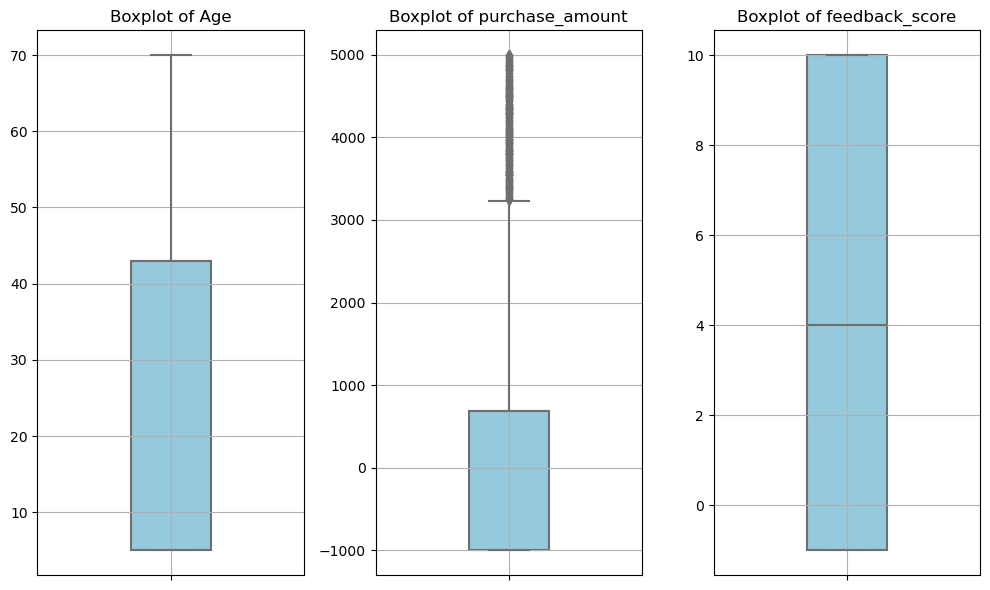

In [135]:
# Boxplot for outlier classification
cols = ['Age', 'purchase_amount', 'feedback_score']
plt.figure(figsize=(10,6))

for i, col in enumerate(cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(y = df[col], color = 'skyblue', width = 0.3)
    plt.title(f'Boxplot of {col}',fontsize = 12)
    plt.ylabel('')
    plt.grid()

plt.tight_layout()
plt.show()
             
           

In [136]:
df.shape

(4781, 10)